In [1]:
import pickle
import os
import fnmatch
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.transforms as mtransforms
import time
from mpl_toolkits import mplot3d
import seaborn as sns
from math import ceil
import re

In [4]:
def plot_single_key_from_data( style = "linear"):
    load_path = "data/"
    ber_list = pickle.load( open(load_path + "ber_list.p","rb"))
    icdf_full = pickle.load( open(load_path + "icdf_full.p","rb"))
    prob_dist = pickle.load( open(load_path + "prob_dist.p","rb"))
    N_list = pickle.load( open(load_path + "N_list.p","rb"))
    eng_data = pickle.load( open(load_path + "eng_data.p","rb"))
    
    Nmax = N_list[-1]
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((2,5),(0,0), colspan=2, rowspan=2)
    ax2 = plt.subplot2grid((2,5),(0,2),  rowspan=2, sharey=ax1)
    ax3 = plt.subplot2grid((2,5),(0,3),  rowspan=2, sharey=ax1)
    ax4 = plt.subplot2grid((2,5),(0,4),  rowspan=2, sharey=ax1)
#     ax5 = plt.subplot2grid((2,6),(0,5),  rowspan=2, sharey=ax1)
    
    fig.subplots_adjust(wspace = 0 ) 
#     print("generation of grid plots - OK")
    fig.set_figheight(16)
    fig.set_figwidth(24)
    f_size = 40
#             color = 'tab:red'
#     ax1.set_xlabel('R', fontsize = f_size)
#             ax1.set_ylabel(r'$P(E) = 1-(1-F(E))^N$', color=color, fontsize = 20)
#     ax1.tick_params(axis='x',  labelsize = f_size)

    target = 0.99


    thickness = 5

    color = 'tab:blue'
    ax1.set_ylabel("E", color="black", fontsize = f_size)  

    icdf_list = icdf_full[0]
    icdf_list90 = icdf_full[1]
    
    if style == "linear" or style == "lin":
        ax1.plot(N_list, ber_list,"-o", color="black", label = r'$\mathbb{E}(Y_N)$', linewidth=thickness )
        ax1.plot(N_list, np.array(icdf_list),"-o", color="xkcd:magenta", label = r'$E_X(N,99\%)$', linewidth=thickness )
        ax1.plot(N_list, np.array(icdf_list90),"-o", color="red", label = r'$E_X(N,90\%)$', linewidth=thickness )
        title = "linear"
        ax1xticks = [10000,30000,50000, 70000,90000]
        ticks_dict = {10000: "10k", 30000 : "30k", 50000 : "50k",  70000: "70k", 90000: "90k"}
        ticks_dict = {10000: "1", 30000 : "3", 50000 : "5",  70000: "7", 90000: "9"}
        ax1.set_xlabel('R ' + r"$(\times10000)$", fontsize = f_size)
        ax1.axvline(x = 1, c = "orange", ls=":", linewidth=1.5,zorder=0)
        ax1.axvline(x = 100, c = "blue", ls=":", linewidth=1.5,zorder=0)
        ax1.axvline(x = 1000, c = "green", ls=":", linewidth=1.5,zorder=0)
        ax1.axvline(x = 10000, c = "red", ls=":", linewidth=1.5,zorder=0)
        
    elif style == "log":
        title = "log"
        ax1.plot(np.log10(N_list), ber_list,"-o", color="black", label = r'$\mathbb{E}(Y_N)$')
        ax1.plot(np.log10(N_list), np.array(icdf_list),"-o", color="xkcd:magenta", label = r'$E_X(N,99\%)$')
        ax1.plot(np.log10(N_list), np.array(icdf_list90),"-o", color="red", label = r'$E_X(N,90\%)$')
        ax1xticks = [0,1,2,3,4,5]
        ticks_dict = {0: r"$1$", 1 : r"$10$", 2 : r"$10^2$", 3: r"$10^3$", 4: r"$10^4$", 5: r"$10^5$"}
#         ticks_dict = {0: r"$0$", 1 : r"$1$", 2 : r"$2$", 3: r"$3$", 4: r"$4$", 5: r"$5$"}
#         ax1.set_xlabel(r'$\log(\# N)$', fontsize = f_size)
        ax1.set_xlabel("R", fontsize = f_size)
        ax1.axvline(x = 0, c = "orange", ls=":", linewidth=3.5,zorder=0)
        ax1.axvline(x = 2, c = "blue", ls=":", linewidth=3.5,zorder=0)
        ax1.axvline(x = 3, c = "green", ls=":", linewidth=3.5,zorder=0)
#         ax1.axvline(x = 4, c = "red", ls=":", linewidth=3.5,zorder=0)
#             ax1.set_ylim([-0.1,1.1])


    ax1.tick_params(axis='y', labelcolor="black", labelsize = f_size)
    ax1.set_yticks(0.05*np.array(range(8)))
    ax1.tick_params(axis = "x", labelsize = f_size )
#     ax1xticks = [0,1,2,3,4,5]
    ax1.set_xticks(ax1xticks)
#     ticks_dict = {0: r"$1$", 1 : r"$10$", 2 : r"$10^2$", 3: r"$10^3$", 4: r"$10^4$", 5: r"$10^5$"}
    labels = [ax1xticks[i] if t not in ticks_dict.keys() else ticks_dict[t] for i,t in enumerate(ax1xticks)]
    ax1.set_xticklabels(labels)
#     ax1.set_xticks([35000, 70000])

    ax1.axhline(y = 0. ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=3.5,zorder=0)#, label = "ground state, "+ r"$E_{1\%}$, "+ r"$E_{5\%}$")
    ax1.axhline(y = 0.01 ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax1.axhline(y = 0.05 ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=3.5,zorder=0)
    

#     print("ax1 plots ok")
#             left, bottom, width, height = [0.7, 0.20, 0.2, 0.2]
#             ax2 = fig.add_axes([left, bottom, width, height])
#             ax2.set_ylabel('Energy')
    ax3.set_xlabel('Probability (Normalized)', fontsize = f_size)
    ax2.tick_params(axis='x',  labelsize = f_size)
    ax3.tick_params(axis='x',  labelsize = f_size)
    ax4.tick_params(axis='x',  labelsize = f_size)
#     ax5.tick_params(axis='x',  labelsize = f_size)
#     ticks_x = np.array(list(range(9))) * 0.002

    ax2.set_xticks([])
    ax3.set_xticks([ ])
    ax4.set_xticks([])
    
    ax2.set_title("R=10", fontsize=f_size)
    ax3.set_title("R=100", fontsize=f_size)
    ax4.set_title("R=1000", fontsize=f_size)
#     ax5.set_xticks([])

#     plt.xticks(list(range(12,45,4)))
#     ax2.set_xticklabels(ticks_x, minor = False)
#             ax2.xticks(np.arange(0))
#             ax2.set_ylim([-0.1,1.1])
    
    probN1 = prob_dist[0]
    probN10 = prob_dist[1]
    probN100 = prob_dist[2]
    probN1000 = prob_dist[3]
#     probN10k = prob_dist[4]
#     print("evaluation of prob of min Ok")
    
    ax2.axhline(y = 0. ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax2.axhline(y = 0.01,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax2.axhline(y = 0.05,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    
    ax3.axhline(y = 0. ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax3.axhline(y = 0.01,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax3.axhline(y = 0.05,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    
    ax4.axhline(y = 0. ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax4.axhline(y = 0.01,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax4.axhline(y = 0.05,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    
#     ax5.axhline(y = 0. ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=1.5,zorder=0)
#     ax5.axhline(y = 0.01,  c = "navy", ls=":", linewidth=1.5,zorder=0)
#     ax5.axhline(y = 0.05,  c = "navy", ls=":", linewidth=1.5,zorder=0)
    
#     plt.setp(ax2.get_xticklabels()[0], visible = False)
#             ax2.bar(prob,eng_center, width = 1, align = "center", orientation = "vertical")
    eng_norm = eng_data[0]
#             ax2.barh(eng_center, prob, height = 40, align = "center")
#             print(len(prob), len(eng_center))
#             print(eng_norm, eng_center)
#             print(prob)
    height_norm = eng_data[1]
    ax2.barh(eng_norm[:-130], probN1[:-130], height = height_norm, align = "center", color="orange")
    ax3.barh(eng_norm[:-130], probN100[:-130], height = height_norm, align = "center", color="b")
    ax4.barh(eng_norm[:-130], probN1000[:-130], height = height_norm, align = "center", color="g")
#     ax5.barh(eng_norm[:-130], probN10k[:-130], height = height_norm, align = "center", color="r")
#             setp(ax2, yticklabels=[])
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.setp(ax4.get_yticklabels(), visible=False)
#     plt.setp(ax5.get_yticklabels(), visible=False)


    fig.subplots_adjust(hspace=0)
    # otherwise the right y-label is slightly clipped

    # These are in unitless percentages of the figure size. (0,0 is bottom left)
#     title = "Plot_art"
#             fig.suptitle(title, fontsize = 15)
    fig.legend(loc=(0.17, 0.75), prop = {"size" : f_size-5} )



    path = "plots/single_keys/"
    if not os.path.exists(path):
        os.makedirs(path)
    fig.savefig(path + title + "_N=" + str(Nmax) + "_step="+ str(100) + "_" + str(np.round(0.99,2)) +  ".pdf", bbox_inches='tight') 

    plt.show()
    plt.clf()
    plt.close(fig)

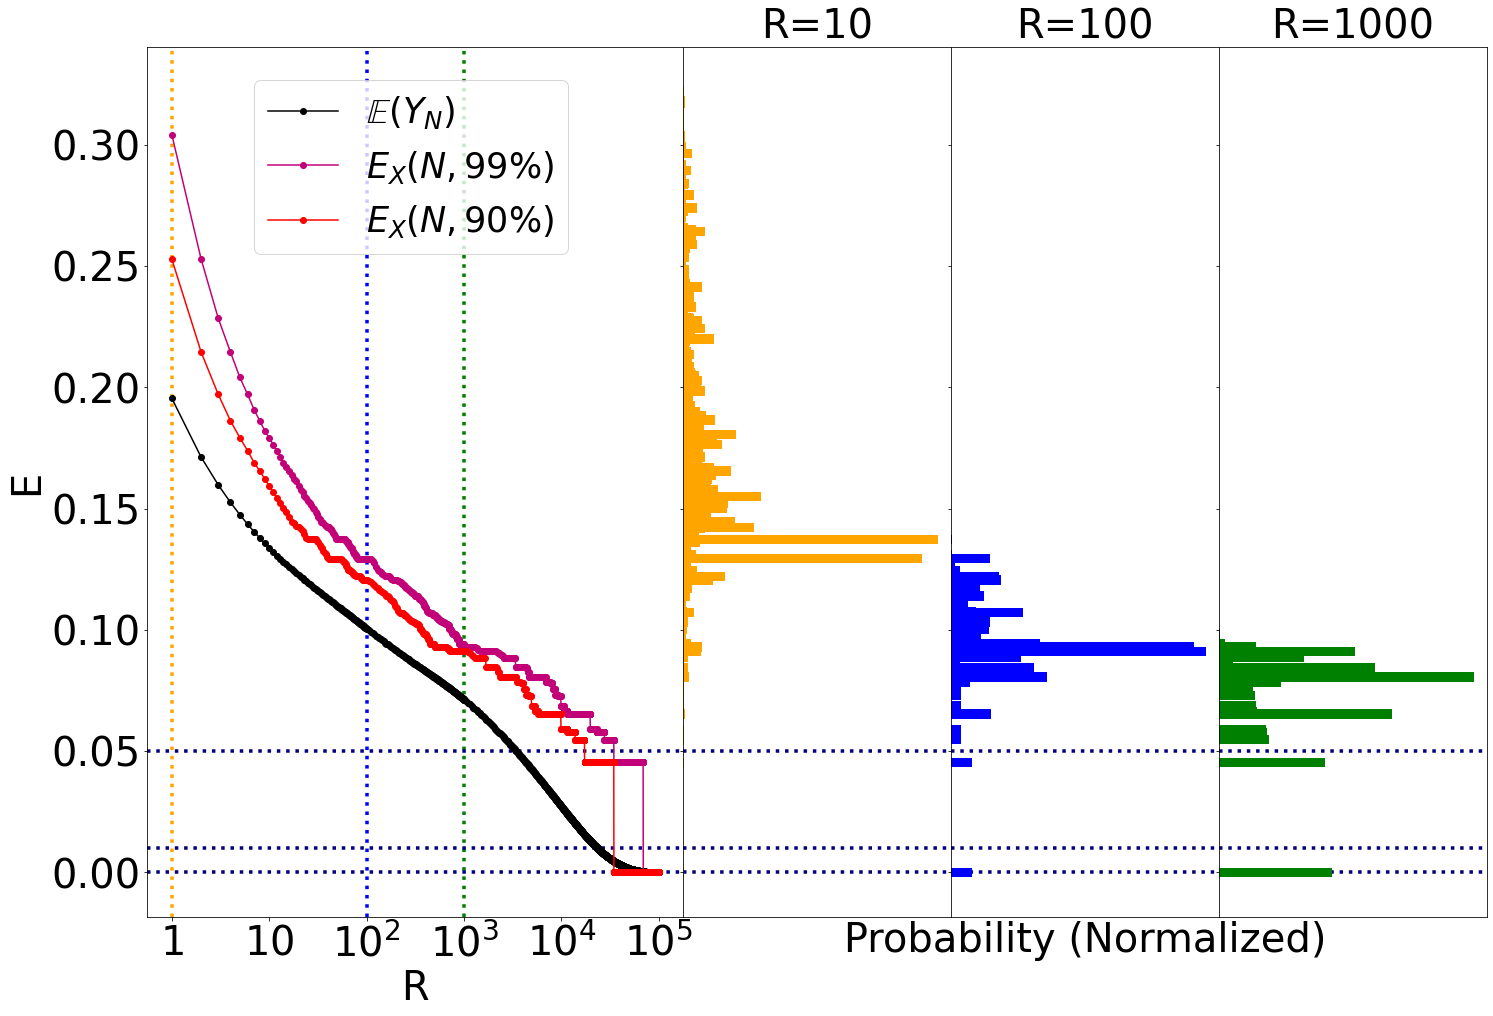

<Figure size 432x288 with 0 Axes>

In [5]:
plot_single_key_from_data( style = "log")

In [14]:
def plot_hists( style = "linear"):
    load_path = "data/"
    ber_list = pickle.load( open(load_path + "ber_list.p","rb"))
    icdf_full = pickle.load( open(load_path + "icdf_full.p","rb"))
    prob_dist = pickle.load( open(load_path + "prob_dist.p","rb"))
    N_list = pickle.load( open(load_path + "N_list.p","rb"))
    eng_data = pickle.load( open(load_path + "eng_data.p","rb"))
    
    Nmax = N_list[-1]
    
    fig = plt.figure()
    ax2 = plt.subplot2grid((1,5),(0,1),  rowspan=2)
    ax3 = plt.subplot2grid((1,5),(0,2),  rowspan=2)
    ax4 = plt.subplot2grid((1,5),(0,3),  rowspan=2)
    ax5 = plt.subplot2grid((1,5),(0,4),  rowspan=2)
#     ax5 = plt.subplot2grid((2,6),(0,5),  rowspan=2)
    
    fig.subplots_adjust(wspace = 0 ) 
#     print("generation of grid plots - OK")
    fig.set_figheight(16)
    fig.set_figwidth(24)
    f_size = 40
#             color = 'tab:red'
#     ax1.set_xlabel('R', fontsize = f_size)
#             ax1.set_ylabel(r'$P(E) = 1-(1-F(E))^N$', color=color, fontsize = 20)
#     ax1.tick_params(axis='x',  labelsize = f_size)

    target = 0.99


    thickness = 5

    color = 'tab:blue'
    icdf_list = icdf_full[0]
    icdf_list90 = icdf_full[1]
    
    
#     print("ax1 plots ok")
#             left, bottom, width, height = [0.7, 0.20, 0.2, 0.2]
#             ax2 = fig.add_axes([left, bottom, width, height])
#             ax2.set_ylabel('Energy')
    ax2.set_ylabel('E \n', fontsize = f_size, rotation=0)
    ax3.set_xlabel('Probability (Normalized)', fontsize = f_size)
    
    ax2.tick_params(axis='x',  labelsize = f_size)
    ax3.tick_params(axis='x',  labelsize = f_size)
    ax4.tick_params(axis='x',  labelsize = f_size)
    ax5.tick_params(axis='x',  labelsize = f_size)
#     ticks_x = np.array(list(range(9))) * 0.002

    ax2.set_xticks([])
    ax3.set_xticks([ ])
    ax4.set_xticks([])
    ax5.set_xticks([])
    
    ax2.set_title("R=10", fontsize=f_size)
    ax3.set_title("R=100", fontsize=f_size)
    ax4.set_title("R=1000", fontsize=f_size)
    ax5.set_title("R=10000", fontsize=f_size)
#     ax5.set_xticks([])

#     plt.xticks(list(range(12,45,4)))
#     ax2.set_xticklabels(ticks_x, minor = False)
#             ax2.xticks(np.arange(0))
#             ax2.set_ylim([-0.1,1.1])
    
    probN1 = prob_dist[0]
    probN10 = prob_dist[1]
    probN100 = prob_dist[2]
    probN1000 = prob_dist[3]
    probN10k = prob_dist[4]
#     print("evaluation of prob of min Ok")
    
    ax2.axhline(y = 0. ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax2.axhline(y = 0.01,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax2.axhline(y = 0.05,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    
    ax3.axhline(y = 0. ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax3.axhline(y = 0.01,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax3.axhline(y = 0.05,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    
    ax4.axhline(y = 0. ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax4.axhline(y = 0.01,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax4.axhline(y = 0.05,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    
    ax5.axhline(y = 0. ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax5.axhline(y = 0.01,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    ax5.axhline(y = 0.05,  c = "navy", ls=":", linewidth=3.5,zorder=0)
    
#     ax5.axhline(y = 0. ,xmin = 0, xmax = Nmax, c = "navy", ls=":", linewidth=1.5,zorder=0)
#     ax5.axhline(y = 0.01,  c = "navy", ls=":", linewidth=1.5,zorder=0)
#     ax5.axhline(y = 0.05,  c = "navy", ls=":", linewidth=1.5,zorder=0)
    
#     plt.setp(ax2.get_xticklabels()[0], visible = False)
#             ax2.bar(prob,eng_center, width = 1, align = "center", orientation = "vertical")
    eng_norm = eng_data[0]
#             ax2.barh(eng_center, prob, height = 40, align = "center")
#             print(len(prob), len(eng_center))
#             print(eng_norm, eng_center)
#             print(prob)
    height_norm = eng_data[1]
    ax2.barh(eng_norm[:-130], probN1[:-130], height = height_norm, align = "center", color="orange")
    ax3.barh(eng_norm[:-130], probN100[:-130], height = height_norm, align = "center", color="b")
    ax4.barh(eng_norm[:-130], probN1000[:-130], height = height_norm, align = "center", color="g")
    ax5.barh(eng_norm[:-130], probN10k[:-130], height = height_norm, align = "center", color="r")
#             setp(ax2, yticklabels=[])
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.setp(ax4.get_yticklabels(), visible=False)
    plt.setp(ax5.get_yticklabels(), visible=False)


    fig.subplots_adjust(hspace=0)
    # otherwise the right y-label is slightly clipped

    # These are in unitless percentages of the figure size. (0,0 is bottom left)
#     title = "Plot_art"
#             fig.suptitle(title, fontsize = 15)



    
    plt.show()
    plt.clf()
    plt.close(fig)

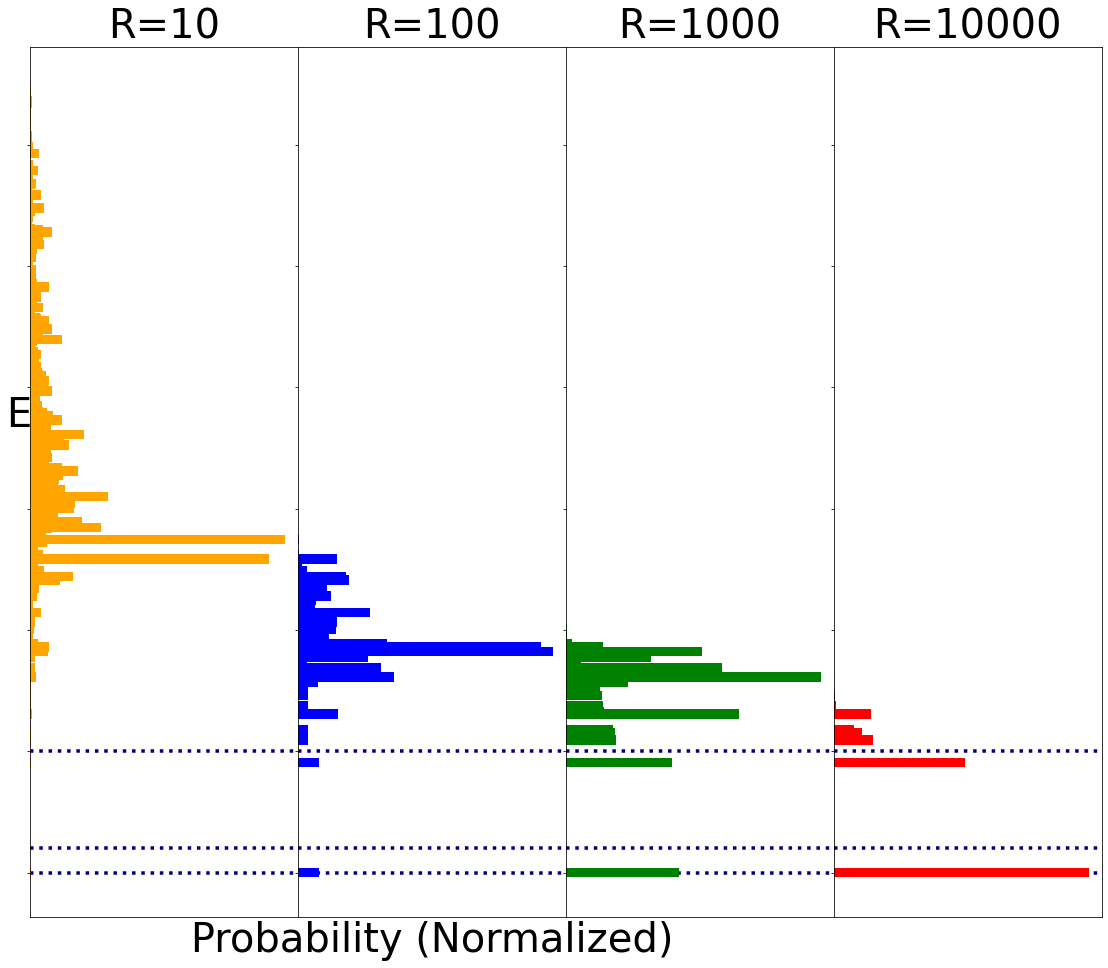

<Figure size 432x288 with 0 Axes>

In [15]:
plot_hists()